# 1 Author

**Student Name**:  Tushara Govinda Reddy
**Student ID**:  EC211256



# 2 Problem formulation

To build and deploy supervised machine learning model for binary classifying ("Potter" and "Starwars") by extracting five features using two songs of MLEnd Hums and Whistles dataset.

# 3 Machine Learning pipeline

The Machine Learning Pipeline of this project can be described as the following:
 mount the drive > upload the input dataset Potter and StarWars datasets to the drive > prepare the input data by unzipping it into a common folder > data label preprocessed to correct labels that don't follow the nomenclature > extract four features of the audio dataset (pitch mean, standard deviation,fraction of voiced region and power) > Normalise the features> Train the model using Support Vector Mechanism > Validate the model> Evaluate by comparirng their accuracies.

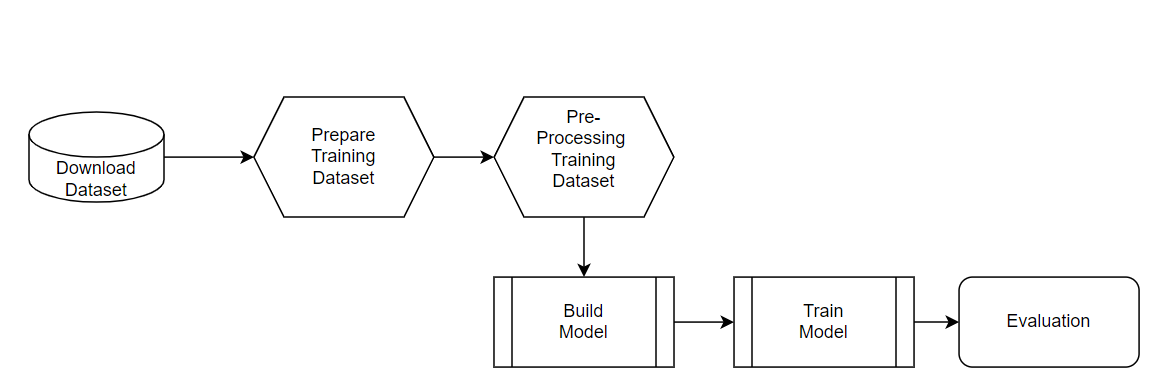

Input: "Potter" and "StarWars" Dataset X_train and y_train
Output: yt_p and yv_p prediction of y training and y validation

# 4 Transformation stage
Audio files contain numerous features hence extracting 5 brings down the complexity of analysis to 5 predictor variables.`

1. Power.
2. Pitch mean.
3. Pitch standard deviation.
4. Fraction of voiced region.




# 5 Modelling

**1. Support Vector Machines:**

Here we are performing the prediction of identifying the type of song of an audio file using the "Potter" and "Starwars" dataset. Since it is a binary classification problem we can employ the Support Vector Machine model, which performs best for supervised learning that uses classification algorithms for two-group classification problems. After giving an SVM model sets of labeled training data for each category, they're able to categorize new text. SVM is best fit apart from neural network algorithms, to provide higher speed and better performance with a limited number of samples.

We will use the SVM method provided by scikit-learn and will split the dataset defined by X and y into a training set and a validation set. We make use of Librosa for feature extraction.

**2. Logistic Regression:** 
 We can also use LR as a “Supervised machine learning” algorithm that can be used to model the probability of a certain class or event. It is used when the data is linearly separable and the outcome is binary or dichotomous in nature here Potter and Starwars. That means Logistic regression is usually used for Binary classification problems. We can pass C = 1e15 and tune the Logisitic Regression model from the scikitlearn library.

#Environment set up

In [3]:
from google.colab import drive

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import os, sys, re, pickle, glob
import urllib.request
import zipfile

import IPython.display as ipd
from tqdm import tqdm
import librosa

drive.mount('/content/drive')

Mounted at /content/drive


# 6 Methodology


This is a binary classification problem which falls under supervised learning, we would split the dataset into training and validation dataset with 80:20 ratio 80% being used to train the model and other 20% being used to test the model.

Then we would build the SVM model for the training data and validate it using the testing data to find accuracies and confusion matrix, evaluate the model and see if it is fitting, underfitting or overfitting. Ideally, we would aim for a model that fits with a good margin for predicition.

# 7 Dataset
**Balanced Dataset:**
Total Number of Files: 414
Potter Files: 206
Starwars Files: 208
Hence we can clear conclude the data is a balanced dataset, we dont need to stratify or use precision or recall to justify the evaluation.

**Data Pre-Processing:**
The labels of each file are split, any additional special characters are removed and the required fields are tabulated in MLENDHM_table. We obtain 414X3 table, with corrected labels.

**Feature Extration**
Using Librosa and NumPy we extract 4 features of the audi files, use them to create the predictor X and label prediction y, each of shape X is (414, 4)
and y is (414,).







#Data download

In [4]:
def download_url(url, save_path):
    with urllib.request.urlopen(url) as dl_file:
        with open(save_path, 'wb') as out_file:
            out_file.write(dl_file.read())

Downloading the data onto a common folder in the Gdrive> /content/drive/MyDrive/Data/MLEndHW/

In [5]:
url1  = "https://collect.qmul.ac.uk/down?t=55VH96QK6RSP0HT4/593DHNA61C7UD57GDI564H0"
save_path1 = '/content/drive/MyDrive/Data/MLEndHW/MLEndHW_SampleA.zip'
download_url(url1, save_path1)

In [6]:
url2  = "https://collect.qmul.ac.uk/down?t=6H53DB234VK8UG2T/555DPM2R3OEF79U4K7SPIEG"
save_path2 = '/content/drive/MyDrive/Data/MLEndHW/MLEndHW_SampleB.zip'
download_url(url2, save_path2)

To check that the MLEndHW folder contains the file 'MLEndHW_Sample.zip'

In [7]:
path = '/content/drive/MyDrive/Data/MLEndHW'
os.listdir(path)

['sample',
 'PottervsStarwars',
 'Binary',
 'MLEndHW_Sample1.zip',
 'MLEndHW_Sample2.zip',
 'MLEndHW_Sample3.zip',
 'MLEndHW_Sample4.zip',
 'MultiClass',
 'PottervsStarwars1',
 'MLEndHW_SampleA.zip',
 'MLEndHW_SampleB.zip']

#Understanding our dataset sample
Unzip the sample data and find the count of total files downloaded.

In [8]:
directory_to_extract_to = '/content/drive/MyDrive/Data/MLEndHW/Binary/'
zip_path = '/content/drive/MyDrive/Data/MLEndHW/MLEndHW_SampleA.zip'
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(directory_to_extract_to)
zip_path = '/content/drive/MyDrive/Data/MLEndHW/MLEndHW_SampleB.zip'
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(directory_to_extract_to)
sample_path = '/content/drive/MyDrive/Data/MLEndHW/Binary/*.wav'
files = glob.glob(sample_path)
len(files)

416

In [9]:
sample_path = '/content/drive/MyDrive/Data/MLEndHW/Binary/*.wav'
files = glob.glob(sample_path)
len(files)

416

In [10]:
for file in files:
  print(file.split('/')[-1])

S1_hum_2_Potter.wav
S1_whistle_2_Potter.wav
S3_hum_2_Potter.wav
S3_hum_1_Potter.wav
S2_hum_2_Potter.wav
S2_whistle_2_Potter.wav
S4_hum_2_Potter.wav
S5_hum_2_Potter.wav
S4_hum_1_Potter.wav
S5_hum_1_Potter.wav
S6_hum_2_Potter.wav
S6_whistle_2_Potter.wav
S7_hum_2_Potter.wav
S7_hum_1_Potter.wav
S8_hum_1_[Potter].wav
S8_hum_4_[Potter].wav
S10_hum_1_Potter .wav
S9_hum_2_Potter.wav
S10_hum_2_Potter .wav
S9_hum_1_Potter.wav
S12_hum_2_Potter .wav
S12_hum_4_Potter .wav
S13_hum_2_Potter.wav
S13_hum_1_Potter.wav
S15_whistle_2_Potter.wav
S15_hum_2_Potter.wav
S16_hum_2_Potter.wav
S18_Hum_2_Potter.wav
S16_whistle_2_Potter.wav
S17_hum_1_Potter.wav
S17_hum_2_Potter.wav
S18_Whistle_2_Potter.wav
S19_hum_1_Potter.wav
S20_hum_2_Potter.wav
S20_hum_1_Potter.wav
S19_hum_2_Potter.wav
S21_hum_1_Potter.wav
S22_hum_1_Potter.wav
S21_hum_2_Potter.wav
S22_hum_2_Potter.wav
S23_hum_1_Potter.wav
S23_hum_2_Potter.wav
S24_hum_2_Potter.wav
S25_hum_1_Potter.wav
S24_whistle_2_Potter.wav
S25_hum_2_Potter.wav
S26_hum_1_Potter

In [11]:
print('The full path to the first audio file is: ', files[0])
print('\n')
print('The name of the first audio file is: ', files[0].split('/')[-1])
print('    The participand ID is: ', files[0].split('/')[-1].split('_')[0])
print('    The type of interpretation is: ', files[0].split('/')[-1].split('_')[1])
print('    The interpretation number is: ', files[0].split('/')[-1].split('_')[2])
print('    The song is: ', files[0].split('/')[-1].split('_')[3])

The full path to the first audio file is:  /content/drive/MyDrive/Data/MLEndHW/Binary/S1_hum_2_Potter.wav


The name of the first audio file is:  S1_hum_2_Potter.wav
    The participand ID is:  S1
    The type of interpretation is:  hum
    The interpretation number is:  2
    The song is:  Potter.wav


#Data PreProcessing

In [12]:
song_name_mapping={
    "Potter":['harry','potterwav','harrypotter'],
    "StarWars":['star','starswars','startwars','starwar','statwars','imperial','march']}

In [13]:
sample_path = '/content/drive/MyDrive/Data/MLEndHW/Binary/*.wav'
files = glob.glob(sample_path)
print('count',len(files))

MLENDHW_table = [] 

for file in files:

  try:
    file_id = file.split('/')[-1]
    file_name = file.split('/')[-1]
    file_name=file_name.replace(' ','_')
    file_name=file_name.replace('[','_')
    file_name=file_name.replace(']','_')
    file_name=file_name.replace('(','_')
    file_name=file_name.replace(')','_')
    file_name=file_name.replace('__','_')
    file_name=file_name.replace('__','_')
    file_name=file_name.replace('_.','.')
    file_name=file_name.lower()

    participant_ID = file_name.split('_')[0]
    interpretation_type = file_name.split('_')[1]
    interpretation_number = file_name.split('_')[2]
    song = file_name.split('_')[3].split('.')[0]
    if song=='1' or song=='2':
      interpretation_type = file_name.split('_')[2]
      interpretation_number = file_name.split('_')[3].split('.')[0]
      song = file_name.split('_')[1]

    for key,val in song_name_mapping.items():
      if song in val:
        song=key.lower()
  except Exception as e:
    print(file_name)

  MLENDHW_table.append([file_id,participant_ID,interpretation_type,interpretation_number, song])

MLENDHW_df = pd.DataFrame(MLENDHW_table,columns=['file_id','participant','interpretation','number','song']).set_index('file_id') 
print(MLENDHW_df.count())

count 416
s42_hum2_starwar.wav
s42_hum3.starwar.wav
participant       416
interpretation    416
number            416
song              416
dtype: int64


In [14]:
MLENDHW_df

,participant,interpretation,number,song
file_id,,,,
S1_hum_2_Potter.wav,s1,hum,2,potter
S1_whistle_2_Potter.wav,s1,whistle,2,potter
S3_hum_2_Potter.wav,s3,hum,2,potter
S3_hum_1_Potter.wav,s3,hum,1,potter
S2_hum_2_Potter.wav,s2,hum,2,potter
...,...,...,...,...
S115_hum_2_StarWars.wav,s115,hum,2,starwars
S42_Hum_2_StarWars.wav,s42,hum,2,starwars
S42_Hum_3_StarWars.wav,s42,hum,3,starwars


In [15]:
MLENDHW_df.groupby('song').size()

song
potter      206
starwars    210
dtype: int64

#Feature extraction : Pitch



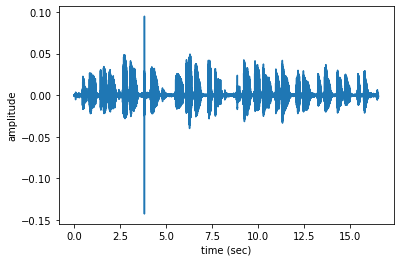

In [16]:
n=0
fs = None # Sampling frequency. If None, fs would be 22050
x, fs = librosa.load(files[n],sr=fs)
t = np.arange(len(x))/fs
plt.plot(t,x)
plt.xlabel('time (sec)')
plt.ylabel('amplitude')
plt.show()
display(ipd.Audio(files[n]))

In [17]:
MLENDHW_df.iloc[n]

participant           s1
interpretation       hum
number                 2
song              potter
Name: S1_hum_2_Potter.wav, dtype: object

In [18]:
n=0
x, fs = librosa.load(files[n],sr=fs)
print('This audio signal has', len(x), 'samples')

This audio signal has 730105 samples


In [19]:
def getPitch(x,fs,winLen=0.02):
  #winLen = 0.02 
  p = winLen*fs
  frame_length = int(2**int(p-1).bit_length())
  hop_length = frame_length//2
  f0, voiced_flag, voiced_probs = librosa.pyin(y=x, fmin=80, fmax=450, sr=fs,
                                                 frame_length=frame_length,hop_length=hop_length)
  return f0,voiced_flag

In [20]:
def getXy(files,labels_file, scale_audio=False, onlySingleDigit=False):
  X,y =[],[]
  for file in tqdm(files):
    fileID = file.split('/')[-1]
    file_name = file.split('/')[-1]
    #print(file_name)
    #print(labels_file.loc[fileID]['song'])
    #print(labels_file.loc[fileID]['song']=='Starwars')
    #yi = list(labels_file.loc[fileID]['song'])[0]=='Starwars'
    yi = labels_file.loc[fileID]['song']=='starwars' 

    fs = None # if None, fs would be 22050
    x, fs = librosa.load(file,sr=fs)
    if scale_audio: x = x/np.max(np.abs(x))
    f0, voiced_flag = getPitch(x,fs,winLen=0.02)
      
    power = np.sum(x**2)/len(x)
    pitch_mean = np.nanmean(f0) if np.mean(np.isnan(f0))<1 else 0
    pitch_std  = np.nanstd(f0) if np.mean(np.isnan(f0))<1 else 0
    voiced_fr = np.mean(voiced_flag)

    xi = [power,pitch_mean,pitch_std,voiced_fr]
    X.append(xi)
    y.append(yi)

  return np.array(X),np.array(y)

In [21]:
X,y = getXy(files, labels_file=MLENDHW_df, scale_audio=True, onlySingleDigit=True)

100%|██████████| 416/416 [18:54<00:00,  2.73s/it]


In [22]:
np.save('X.npy', X)

In [37]:
X= np.load('X.npy')

In [38]:
print('The shape of X is', X.shape) 
print('The shape of y is', y.shape)
print('The labels vector is', y)

The shape of X is (416, 4)
The shape of y is (416,)
The labels vector is [False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False Fa

In [25]:
print(' The number of Starwars recordings is ', np.count_nonzero(y))
print(' The number of Potter recordings is ', y.size - np.count_nonzero(y))

 The number of Starwars recordings is  210
 The number of Potter recordings is  206


# 8 Results


We use the sklearn library to split our dataset into training and testing by 80:20 ratio.X_train, X_val, y_train, y_val of shapes ((332, 4), (84, 4), (332,), (84,)).
**We use random samples and we stratify the data to ensure we have equal divide of both classes in the training and validation set, so that the supervised learning is not skewed.**

In [68]:
from sklearn import svm
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X,y,test_size=0.2,random_state=42, stratify=y)
X_train.shape, X_val.shape, y_train.shape, y_val.shape

((332, 4), (84, 4), (332,), (84,))

Let's now fit an SVM model and print both the training accuracty and validation accuracy

In [69]:
model  = svm.SVC(C=1)
model.fit(X_train,y_train)

yt_p = model.predict(X_train)
yv_p = model.predict(X_val)

print('Training Accuracy', np.mean(yt_p==y_train))
print('Validation  Accuracy', np.mean(yv_p==y_val))
print('The support vectors are', model.support_vectors_.shape)

Training Accuracy 0.5060240963855421
Validation  Accuracy 0.5
The support vectors are (329, 4)


Since the accuracy is on the lower side we can normalise the predictors, to see if the performance improves.

In [70]:
mean = X_train.mean(0)
sd =  X_train.std(0)

X_train = (X_train-mean)/sd
X_val  = (X_val-mean)/sd

model  = svm.SVC(C=1,gamma=2)
model.fit(X_train,y_train)

yt_p = model.predict(X_train)
yv_p = model.predict(X_val)

print('Training Accuracy', np.mean(yt_p==y_train))
print('Validation  Accuracy', np.mean(yv_p==y_val))
print('The support vectors are', model.support_vectors_.shape)

Training Accuracy 0.8373493975903614
Validation  Accuracy 0.6071428571428571
The support vectors are (287, 4)


Initally we observe the validation accuracy is greater than the training accuracy this is indicates the requirement for normalisation of accuracies.

**Upon normalization we can observe that Training Accuracy is 83% and Validation Accuracy is 61% wich indicates that the model is able to learn the classification of two classes perfectly upto 83% accuracy during training, however upon deployment its the performaance drops to 61%.**

In [71]:
from sklearn.metrics import confusion_matrix

train_confusion_matrix = confusion_matrix(y_true=y_train, y_pred=model.predict(X_train))
train_confusion_matrix_normalised = train_confusion_matrix.astype('float') / train_confusion_matrix.sum(axis=1)[:, np.newaxis]

val_confusion_matrix = confusion_matrix(y_true=y_val, y_pred=model.predict(X_val))
val_confusion_matrix_normalised = val_confusion_matrix.astype('float') / val_confusion_matrix.sum(axis=1)[:, np.newaxis]

print('Training confusion matrix:\n {}\n'.format(train_confusion_matrix))
print('Validation confusion matrix:\n {}\n'.format(val_confusion_matrix))

print('Normalised training confusion matrix:\n {}\n'.format(train_confusion_matrix_normalised))
print('Normalised validation confusion matrix:\n {}\n'.format(val_confusion_matrix_normalised))

Training confusion matrix:
 [[137  27]
 [ 27 141]]

Validation confusion matrix:
 [[27 15]
 [18 24]]

Normalised training confusion matrix:
 [[0.83536585 0.16463415]
 [0.16071429 0.83928571]]

Normalised validation confusion matrix:
 [[0.64285714 0.35714286]
 [0.42857143 0.57142857]]



The confusion matrix further examines that the classification of True Positives-Starwars has normalised validation accuracy of 65%  which indicates that 65% of Starwars dataset is correctly classified and 35% is misclassified and False Negatives-Potter has normalised validation accuracy of 57% which indicates that 57% Potter dataset is correctly classified and 43% is misclassified.

**The model indicates good training accuracy but a comparitively lower validation accuray hence the model is overfitting.**

**Method 2:** Logistics Regression

In [72]:
from sklearn import svm
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X,y,test_size=0.3,random_state=42, stratify=y)
X_train.shape, X_val.shape, y_train.shape, y_val.shape

((291, 4), (125, 4), (291,), (125,))

In [62]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

log_reg_classifier_A = LogisticRegression(C=1e15, solver='lbfgs', multi_class='multinomial')
log_reg_classifier_A.fit(X_train, y_train)

# Here we obtain and print the confusion matrices for the logistic regression classifier trained with data from region A
train_confusion_matrix_A = confusion_matrix(y_true=y_train, y_pred=log_reg_classifier_A.predict(X_train))
train_confusion_matrix_normalised_A = train_confusion_matrix_A.astype('float') / train_confusion_matrix_A.sum(axis=1)[:, np.newaxis]

val_confusion_matrix_A = confusion_matrix(y_true=y_val, y_pred=log_reg_classifier_A.predict(X_val))
val_confusion_matrix_normalised_A = val_confusion_matrix_A.astype('float') / val_confusion_matrix_A.sum(axis=1)[:, np.newaxis]

print('Training confusion matrix:\n {}\n'.format(train_confusion_matrix_A))
print('Validation confusion matrix:\n {}\n'.format(val_confusion_matrix_A))

print('Normalised training confusion matrix:\n {}\n'.format(train_confusion_matrix_normalised_A))
print('Normalised validation confusion matrix:\n {}\n'.format(val_confusion_matrix_normalised_A))


Training confusion matrix:
 [[76 68]
 [61 86]]

Validation confusion matrix:
 [[27 35]
 [25 38]]

Normalised training confusion matrix:
 [[0.52777778 0.47222222]
 [0.41496599 0.58503401]]

Normalised validation confusion matrix:
 [[0.43548387 0.56451613]
 [0.3968254  0.6031746 ]]



The normalised training and validation vlaues of the confusion matrix on the random samples of the same dataset indicate that the model is underfitting for this case.
It is evident that 43% of Starwars files are correctly classified when 56% are misclassified and 60% of Potter files are correctly classified when 40% are misclassified. Thus indicating a high error margin and low accuracy.

**The model built using logistic regression could be underfitting the given dataset for a binary supervised machine learning.**


# 9 Conclusions

**We can conclude that the binary supervised machine learning model trained using a balanced, cleaned "Potter' and "Starwars" dataset on Logisitc regression model has been underfitting due to poor classification and trend identification of the training and validation accuracies, however Support Vector Machine Model, has performed with high training accuracies but low validation accuracies leading to an overfitting of the model. Overfitting is a problem that can identified and solved better than underfitting in genreal, hence SVM model is a better fit in this given scenario, otherwise neural network algorithms work best.**